In [82]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
train_df = pd.read_csv('/kaggle/input/predict-ship-survival/train.csv')
test_df = pd.read_csv('/kaggle/input/predict-ship-survival/test.csv')

# EDA

In [84]:
train_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan
0,0001_01,Jakarta,False,B/0/P,Bali,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Lampung,False,F/0/S,Bali,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Jakarta,False,A/0/S,Bali,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Jakarta,False,A/0/S,Bali,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Lampung,False,F/1/S,Bali,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [85]:
combine = [train_df, test_df]

In [86]:
for data in combine:
    # Memisahkan column penumpang_id
    data[['grup_id', 'penumpang_id']] = data['Penumpang_id'].str.split('_', expand=True)
    data['grup_id'] = data['grup_id'].astype(int)
    data['penumpang_id'] = data['penumpang_id'].astype(int)

    # keep null value
    def convert_to_int(value):
        try:
            return int(value)
        except (ValueError, TypeError):
            return np.NaN

    data[['dek', 'nomer_duduk', 'sisi']] = data['Kabin'].str.split('/', expand=True)
    data['nomer_duduk'] = data['nomer_duduk'].apply(convert_to_int)

    data['total_pengeluaran'] = data['Servis_Kamar_Tambahan'] + data['Belanja_Makanan'] + data['Belanja_Merchandise'] + data['Spa'] + data['Bioskop']


    data['Sleeper_Plus'] = data['Sleeper_Plus'].apply(convert_to_int)
    data['VIP'] = data['VIP'].apply(convert_to_int)


train_df['Tiba_Ditujuan'] = train_df['Tiba_Ditujuan'].apply(convert_to_int)
combine = [train_df, test_df]
train_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan,grup_id,penumpang_id,dek,nomer_duduk,sisi,total_pengeluaran
0,0001_01,Jakarta,0.0,B/0/P,Bali,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0.0,P,0.0
1,0002_01,Lampung,0.0,F/0/S,Bali,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,F,0.0,S,736.0
2,0003_01,Jakarta,0.0,A/0/S,Bali,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,A,0.0,S,10383.0
3,0003_02,Jakarta,0.0,A/0/S,Bali,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,A,0.0,S,5176.0
4,0004_01,Lampung,0.0,F/1/S,Bali,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,F,1.0,S,1091.0


In [87]:
test_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,grup_id,penumpang_id,dek,nomer_duduk,sisi,total_pengeluaran
0,7388_01,Lampung,1.0,G/1198/S,Aceh,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Sterry Mclardson,7388,1,G,1198.0,S,0.0
1,7390_01,Lampung,0.0,G/1190/P,Bali,62.0,0.0,240.0,0.0,0.0,586.0,10.0,Isa Wiggs,7390,1,G,1190.0,P,836.0
2,7391_01,Lampung,1.0,G/1191/P,Bali,32.0,0.0,0.0,0.0,0.0,NaN,0.0,Joycey Coffmaney,7391,1,G,1191.0,P,NaN
3,7392_01,Lampung,1.0,G/1192/P,Bali,37.0,0.0,0.0,0.0,0.0,0.0,0.0,Floyde Holton,7392,1,G,1192.0,P,0.0
4,7393_01,Lampung,0.0,E/478/P,NaN,40.0,0.0,0.0,0.0,0.0,7.0,782.0,Coracy Barks,7393,1,E,478.0,P,789.0


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Penumpang_id           6954 non-null   object 
 1   Asal                   6793 non-null   object 
 2   Sleeper_Plus           6783 non-null   float64
 3   Kabin                  6792 non-null   object 
 4   Tujuan                 6804 non-null   object 
 5   Umur                   6800 non-null   float64
 6   VIP                    6796 non-null   float64
 7   Servis_Kamar_Tambahan  6804 non-null   float64
 8   Belanja_Makanan        6801 non-null   float64
 9   Belanja_Merchandise    6786 non-null   float64
 10  Spa                    6808 non-null   float64
 11  Bioskop                6792 non-null   float64
 12  Nama                   6789 non-null   object 
 13  Tiba_Ditujuan          6954 non-null   int64  
 14  grup_id                6954 non-null   int64  
 15  penu

In [89]:
train_df.describe()

,Sleeper_Plus,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Tiba_Ditujuan,grup_id,penumpang_id,nomer_duduk,total_pengeluaran
count,6783.000000,6800.000000,6796.000000,6804.000000,6801.000000,6786.000000,6808.000000,6792.000000,6954.000000,6954.000000,6954.000000,6792.000000,6203.000000
mean,0.356479,28.883676,0.021483,225.257055,458.740038,174.220749,312.969741,302.348793,0.510498,3702.777538,1.517400,477.584069,1493.385136
std,0.478994,14.570737,0.144999,662.105367,1634.970406,550.497694,1152.953321,1139.927062,0.499926,2125.139270,1.048129,406.404257,2853.118476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1850.750000,1.000000,133.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3741.500000,1.000000,334.500000,744.000000
75%,1.000000,38.000000,0.000000,48.000000,76.000000,27.000000,58.000000,44.000000,1.000000,5561.000000,2.000000,805.250000,1506.500000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,12253.000000,22408.000000,24133.000000,1.000000,7387.000000,8.000000,1527.000000,35987.000000


In [90]:
train_df.isnull().sum()

Penumpang_id               0
Asal                     161
Sleeper_Plus             171
Kabin                    162
Tujuan                   150
Umur                     154
VIP                      158
Servis_Kamar_Tambahan    150
Belanja_Makanan          153
Belanja_Merchandise      168
Spa                      146
Bioskop                  162
Nama                     165
Tiba_Ditujuan              0
grup_id                    0
penumpang_id               0
dek                      162
nomer_duduk              162
sisi                     162
total_pengeluaran        751
dtype: int64

In [91]:
train_df.describe(include=['O'])

,Penumpang_id,Asal,Kabin,Tujuan,Nama,dek,sisi
count,6954,6793,6792,6804,6789,6792,6792
unique,6954,3,5244,3,6777,8,2
top,0001_01,Lampung,G/734/S,Bali,Sus Coolez,F,S
freq,1,3668,8,4747,2,2229,3417


---

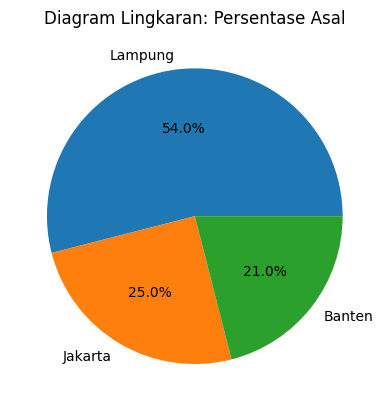

In [92]:
counts_asal = train_df['Asal'].value_counts()
plt.pie(counts_asal.values, labels=counts_asal.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Asal')
plt.show()

In [93]:
train_df[['Asal', 'Tiba_Ditujuan']].groupby(['Asal'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Asal,Tiba_Ditujuan
1,Jakarta,0.658422
0,Banten,0.519972
2,Lampung,0.436750


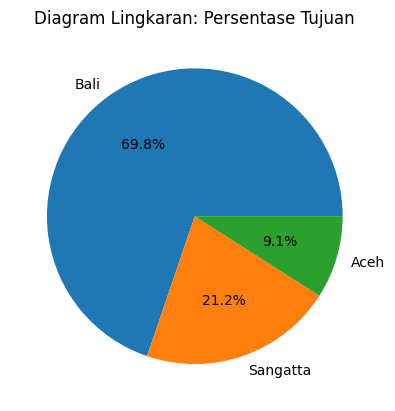

In [94]:
counts_tujuan = train_df['Tujuan'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Tujuan')
plt.show()

### Soal 5
- Lampung menjadi kota asal paling banyak (54%)
- Bali menjadi kota tujuan paling banyak (69.8%)

---

In [95]:
train_df[['Tujuan', 'Tiba_Ditujuan']].groupby(['Tujuan'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Tujuan,Tiba_Ditujuan
2,Sangatta,0.612075
0,Aceh,0.514610
1,Bali,0.478618


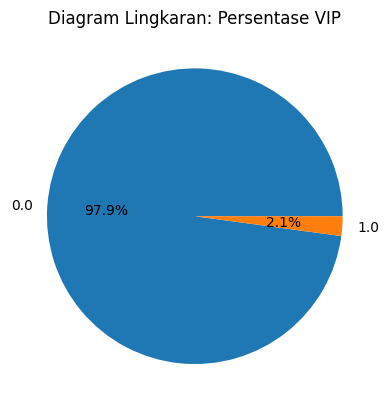

In [96]:
counts_vip = train_df['VIP'].value_counts()
plt.pie(counts_vip.values, labels=counts_vip.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase VIP')
plt.show()

In [97]:
train_df[['VIP', 'Tiba_Ditujuan']].groupby(['VIP'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,VIP,Tiba_Ditujuan
0,0.0,0.512782
1,1.0,0.397260


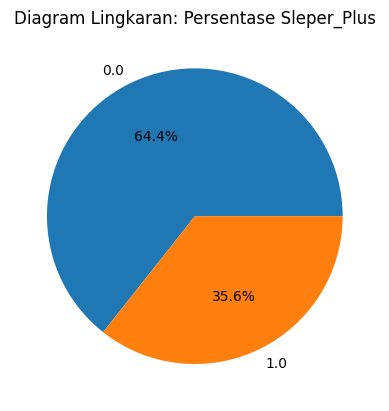

In [98]:
counts_tujuan = train_df['Sleeper_Plus'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Sleper_Plus')
plt.show()

In [99]:
train_df[['Sleeper_Plus', 'Tiba_Ditujuan']].groupby(['Sleeper_Plus'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Sleeper_Plus,Tiba_Ditujuan
1,1.0,0.820513
0,0.0,0.338373


In [100]:
train_df[['penumpang_id', 'Tiba_Ditujuan']].groupby(['penumpang_id'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,penumpang_id,Tiba_Ditujuan
2,3,0.630435
3,4,0.604278
4,5,0.592233
1,2,0.558016
5,6,0.508197
6,7,0.486486
0,1,0.483903
7,8,0.285714


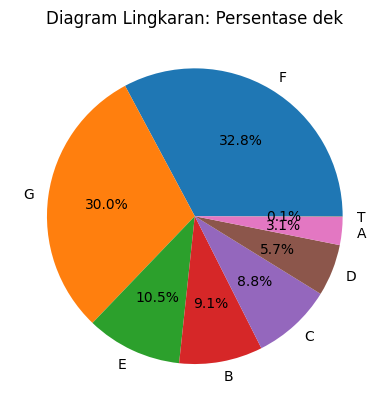

In [101]:
counts_tujuan = train_df['dek'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase dek')
plt.show()

In [102]:
train_df[['dek', 'Tiba_Ditujuan']].groupby(['dek'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,dek,Tiba_Ditujuan
1,B,0.722581
2,C,0.690756
6,G,0.536047
0,A,0.490385
5,F,0.446837
3,D,0.436364
4,E,0.351617
7,T,0.200000


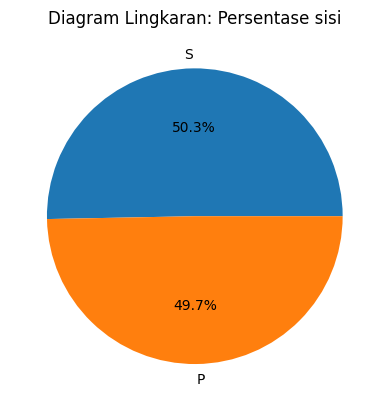

In [103]:
counts_tujuan = train_df['sisi'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase sisi')
plt.show()

In [104]:
train_df[['sisi', 'Tiba_Ditujuan']].groupby(['sisi'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,sisi,Tiba_Ditujuan
1,S,0.567749
0,P,0.453037



---


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


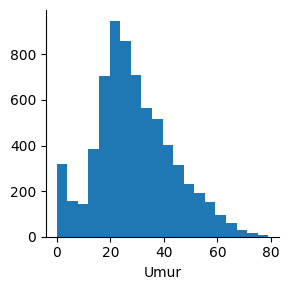

In [105]:
g = sns.FacetGrid(train_df)
g.map(plt.hist, 'Umur', bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


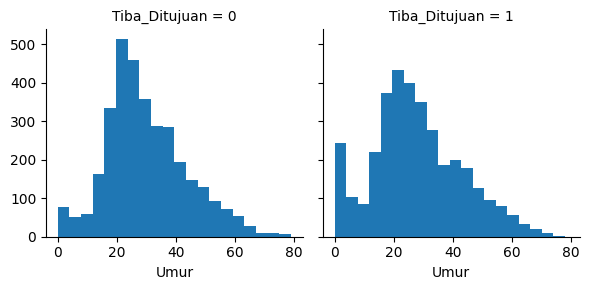

In [106]:
g = sns.FacetGrid(train_df, col='Tiba_Ditujuan')
g.map(plt.hist, 'Umur', bins=20)

### Soal 1
- Penumpang terbanyak dilihat jika penumpang terbanyak terdapat pada rentang umur 20-24
- Dapat dilihat jika terdapat perbandingan signifikan pada umur 0-4. Kelompok umur tersebut cenderung tiba ditujuan

---

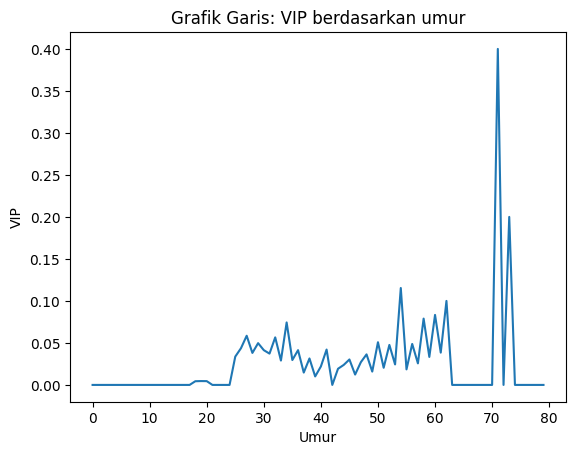

In [107]:
dataframe_birth_vip = train_df.groupby('Umur')['VIP'].mean()
plt.plot(dataframe_birth_vip.index, dataframe_birth_vip.values)
plt.title('Grafik Garis: VIP berdasarkan umur')
plt.xlabel('Umur')
plt.ylabel('VIP')
plt.show()

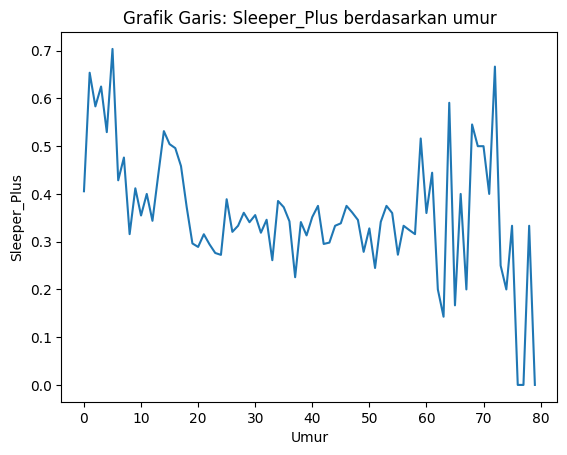

In [108]:
dataframe_birth_sleeperplus = train_df.groupby('Umur')['Sleeper_Plus'].mean()
plt.plot(dataframe_birth_sleeperplus.index, dataframe_birth_sleeperplus.values)
plt.title('Grafik Garis: Sleeper_Plus berdasarkan umur')
plt.xlabel('Umur')
plt.ylabel('Sleeper_Plus')
plt.show()

### Soal 2
- Penumpang yang menggunakan VIP cenderung sedikit dan didominasi rentang usia 20-65 dan 70-80
- Penumpang yang menggunakan Sleeper didominasi umur 0-10 dan 60-70

---

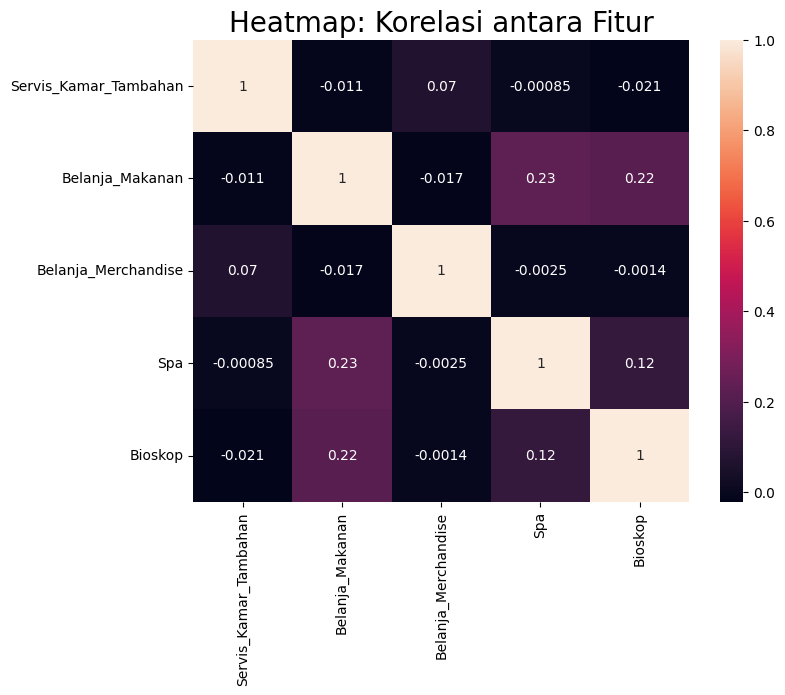

In [109]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df[['Servis_Kamar_Tambahan', 'Belanja_Makanan', 'Belanja_Merchandise', 'Spa', 'Bioskop']].corr(), annot=True)
plt.title('Heatmap: Korelasi antara Fitur', fontsize=20)
plt.show()

### Soal 3
- Data pengeluaran memiliki korelasi yang tidak terlalu kuat, dapat dilihat dari nilai heatmap

---

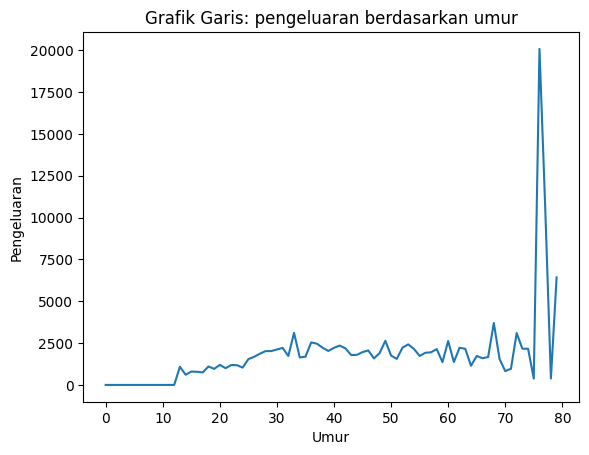

In [110]:
dataframe_birth_pengeluaran= train_df.groupby('Umur')['total_pengeluaran'].mean()
plt.plot(dataframe_birth_pengeluaran.index, dataframe_birth_pengeluaran.values)
plt.title('Grafik Garis: pengeluaran berdasarkan umur')
plt.xlabel('Umur')
plt.ylabel('Pengeluaran')
plt.show()

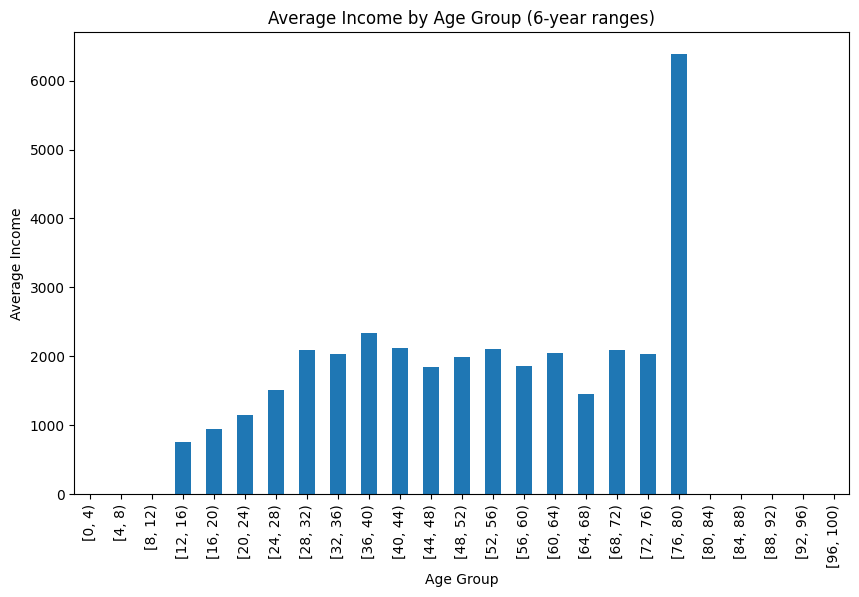

In [111]:
train_df['range_umur'] = pd.cut(train_df['Umur'], bins=range(0, 101, 4), right=False)

average_income_by_age_group = train_df.groupby('range_umur')['total_pengeluaran'].mean()

plt.figure(figsize=(10, 6))
average_income_by_age_group.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income by Age Group (6-year ranges)')
plt.show()

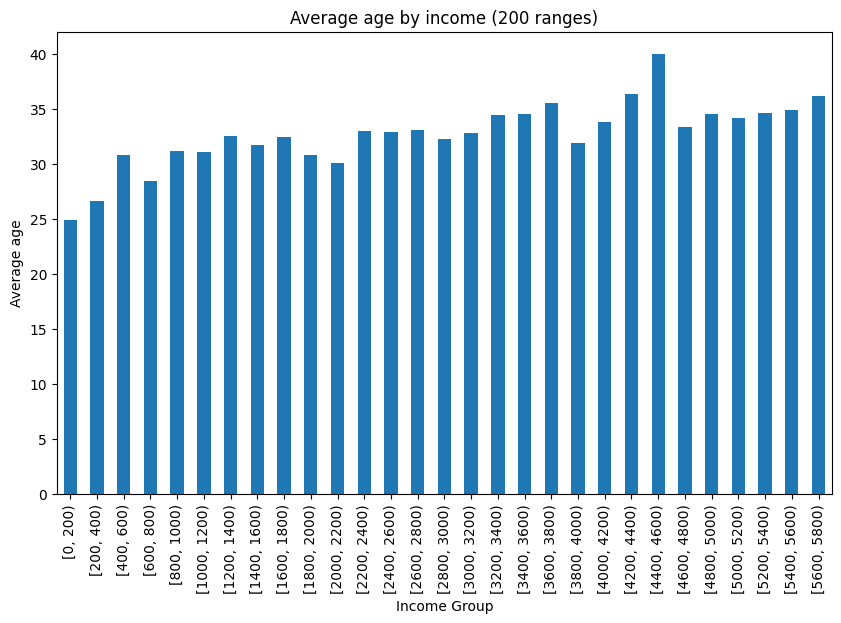

In [112]:
train_df['range_pengeluaran'] = pd.cut(train_df['total_pengeluaran'], bins=range(0, 6000, 200), right=False)

average_age_by_income = train_df.groupby('range_pengeluaran')['Umur'].mean()

plt.figure(figsize=(10, 6))
average_age_by_income.plot(kind='bar')
plt.xlabel('Income Group')
plt.ylabel('Average age')
plt.title('Average age by income (200 ranges)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


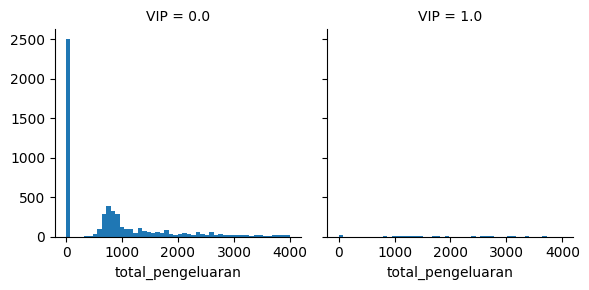

In [113]:
g = sns.FacetGrid(train_df[train_df['total_pengeluaran'] < 4000], col='VIP')
g.map(plt.hist, 'total_pengeluaran', bins=50)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


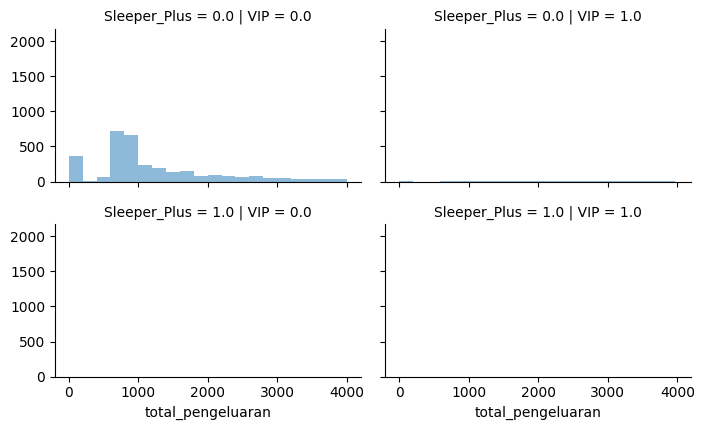

In [114]:
grid = sns.FacetGrid(train_df[train_df['total_pengeluaran'] < 4000], col='VIP', row='Sleeper_Plus', height=2.2, aspect=1.6)
grid.map(plt.hist, 'total_pengeluaran', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


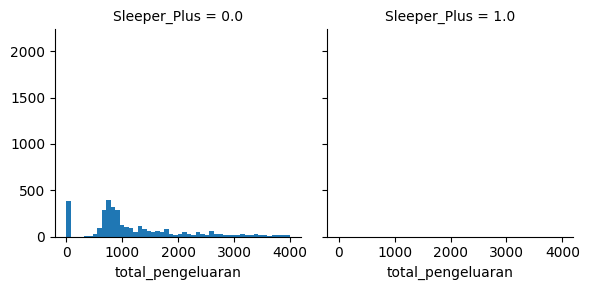

In [115]:
g = sns.FacetGrid(train_df[train_df['total_pengeluaran'] < 4000], col='Sleeper_Plus')
g.map(plt.hist, 'total_pengeluaran', bins=50)

### Soal 4
- Penmpang yang tidak

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


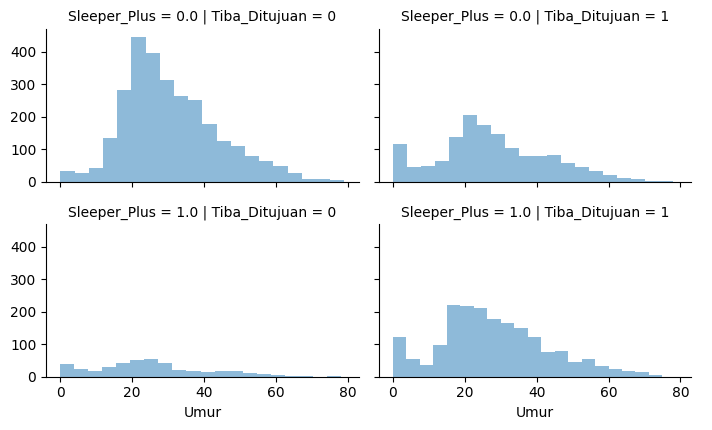

In [116]:
grid = sns.FacetGrid(train_df, col='Tiba_Ditujuan', row='Sleeper_Plus', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Umur', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


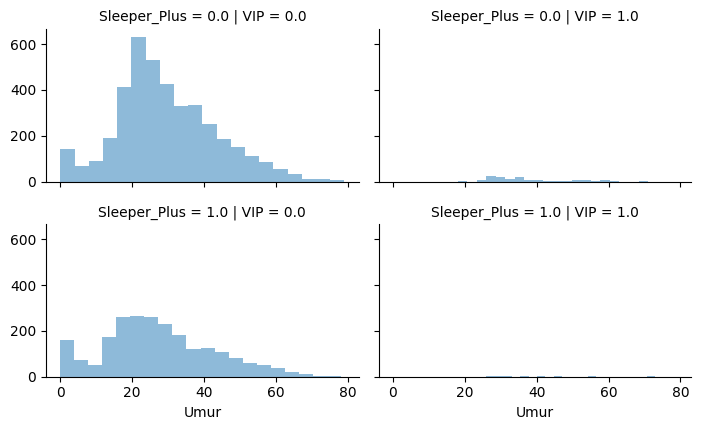

In [117]:
grid = sns.FacetGrid(train_df, col='VIP', row='Sleeper_Plus', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Umur', alpha=.5, bins=20)
grid.add_legend();

### Soal 4
- Penumpang yang tidak VIP cenderung memiliki pengeluaran lebih banyak

---

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


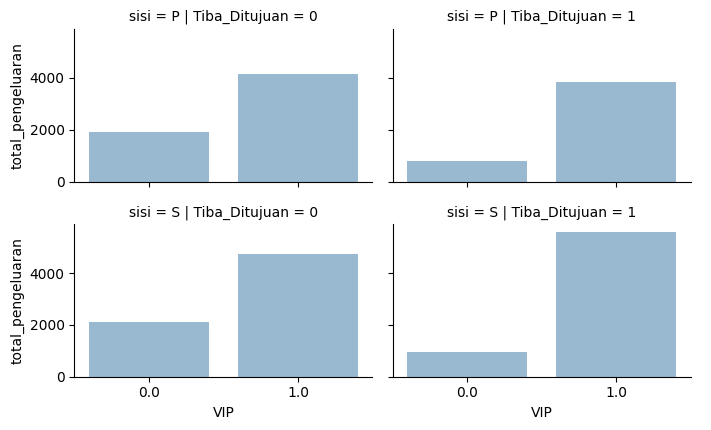

In [118]:
grid = sns.FacetGrid(train_df, row='sisi', col='Tiba_Ditujuan', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'VIP', 'total_pengeluaran', alpha=.5, errorbar=None)
grid.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


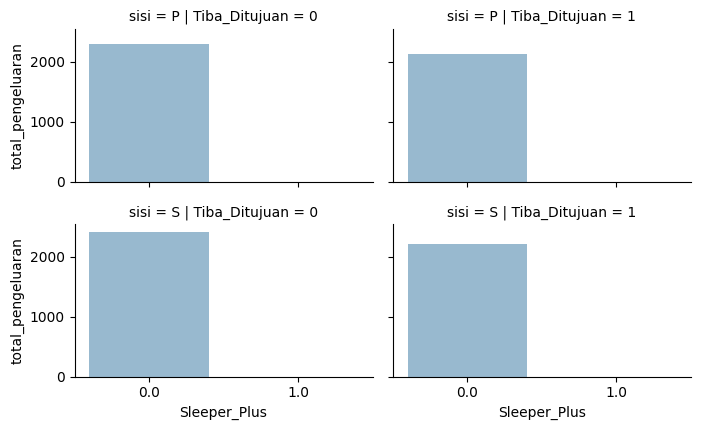

In [119]:
grid = sns.FacetGrid(train_df, row='sisi', col='Tiba_Ditujuan', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sleeper_Plus', 'total_pengeluaran', alpha=.5, errorbar=None)
grid.add_legend()

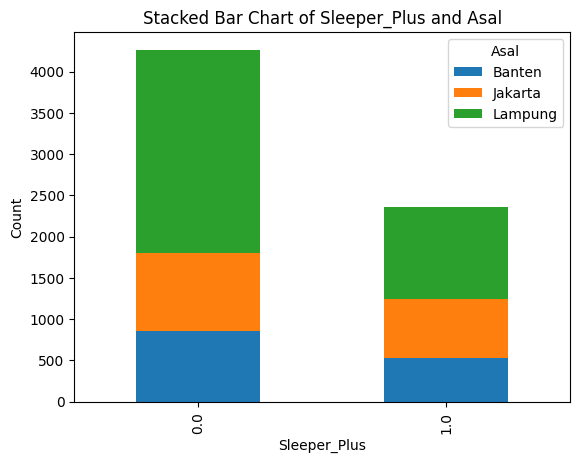

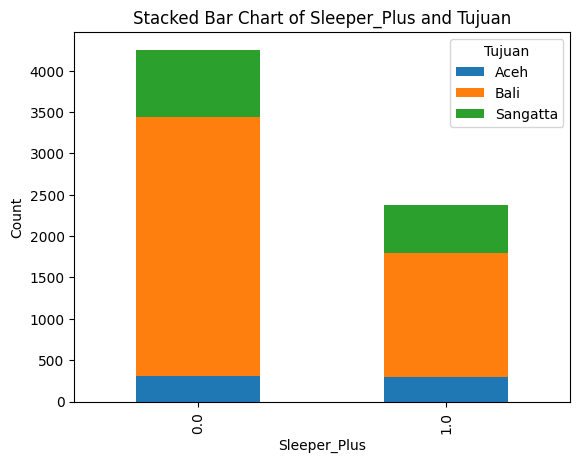

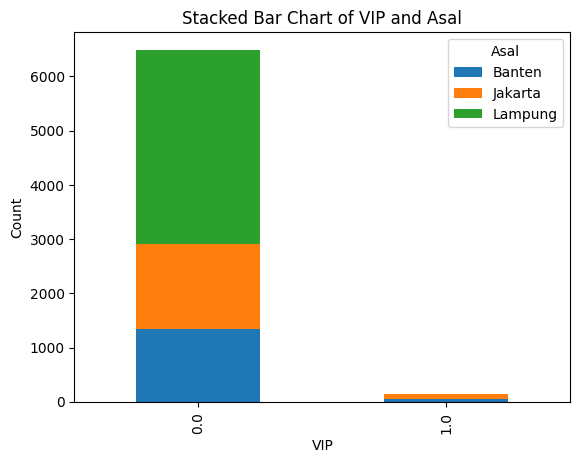

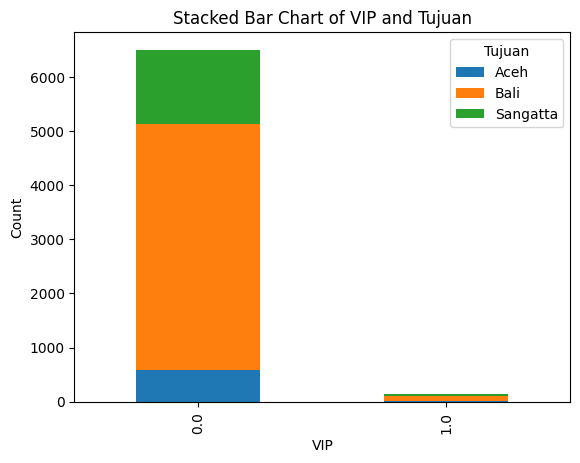

In [120]:
counts = train_df.groupby(['Sleeper_Plus', 'Asal']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('Sleeper_Plus')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Sleeper_Plus and Asal')
plt.show()

counts = train_df.groupby(['Sleeper_Plus', 'Tujuan']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('Sleeper_Plus')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Sleeper_Plus and Tujuan')
plt.show()

counts = train_df.groupby(['VIP', 'Asal']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of VIP and Asal')
plt.show()

counts = train_df.groupby(['VIP', 'Tujuan']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of VIP and Tujuan')
plt.show()


### Soal 6
- Lampung menjadi kota asal yang penumpangnya paling banyak menggunakan sleeper_plus
- Bali menjadi kota tujuan yang penumpangnya paling banyak menggunakan sleeper_plus
- Namun kedua kota itu memiliki persentase penumpang paling banyak juga

---

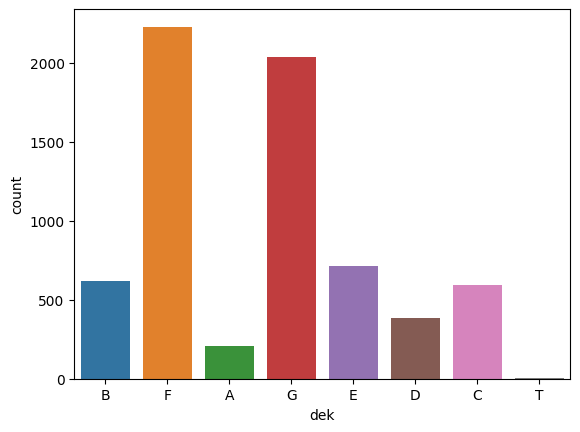

In [121]:
sns.countplot(x='dek', data=train_df, )
plt.show()

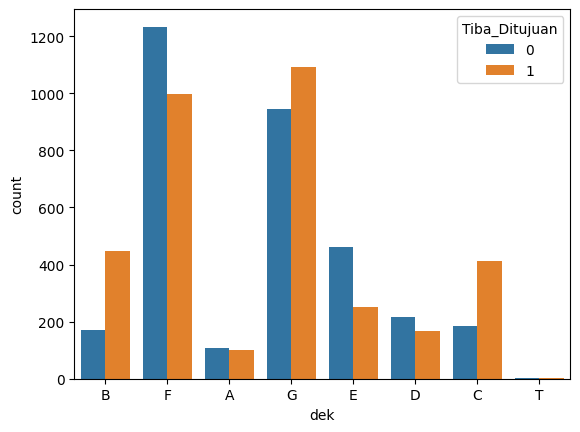

In [122]:
sns.countplot(x='dek', data=train_df, hue='Tiba_Ditujuan' )
plt.show()

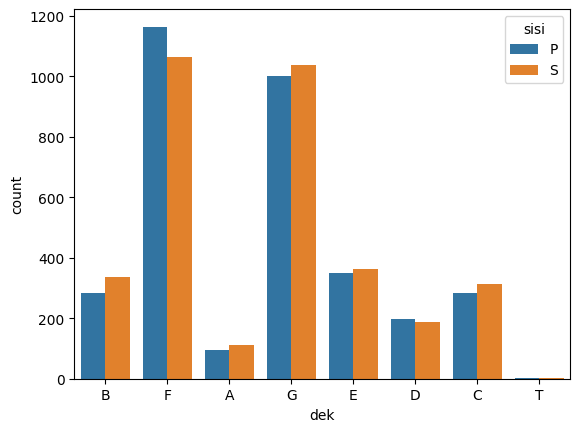

In [123]:
sns.countplot(x='dek', data=train_df, hue='sisi' )
plt.show()

### soal 7
- Penumpang lebih banyak pada dek F dan G
- Persebaran pada dua sisi cenderung sama

---

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


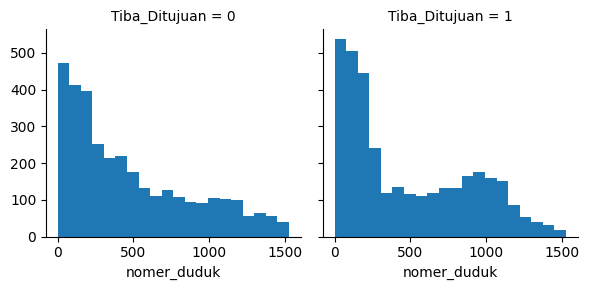

In [124]:
g = sns.FacetGrid(train_df, col='Tiba_Ditujuan')
g.map(plt.hist, 'nomer_duduk', bins=20)

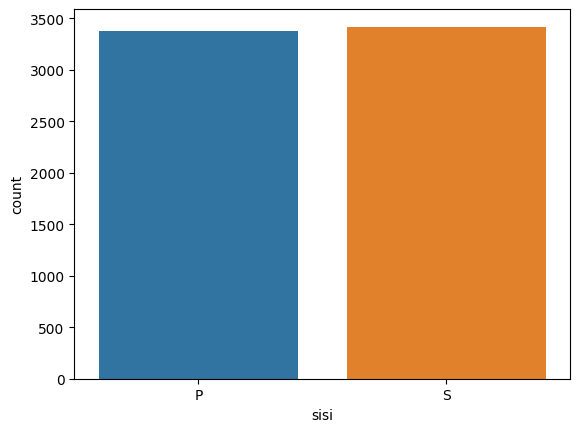

In [125]:
sns.countplot(x='sisi', data=train_df)
plt.show()

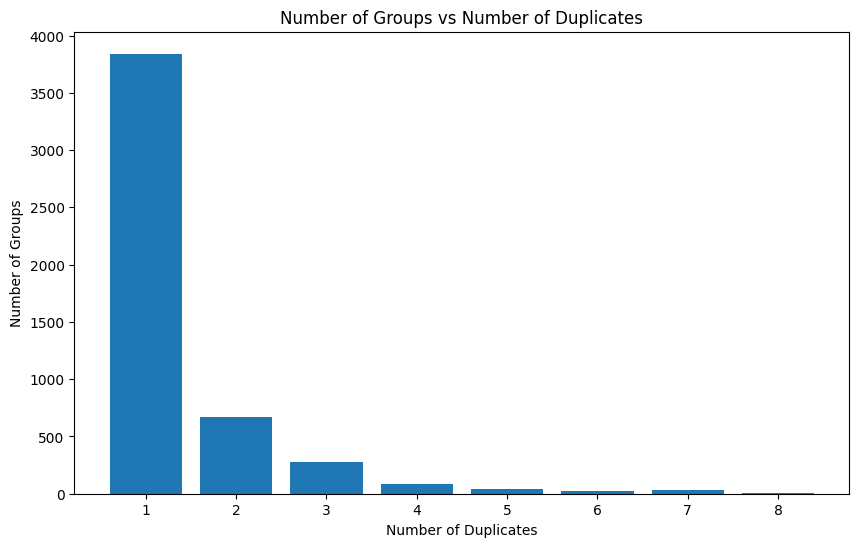

In [126]:
duplicates_count = train_df['grup_id'].value_counts()
count_of_counts = duplicates_count.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(count_of_counts.index, count_of_counts.values)
plt.xlabel('Number of Duplicates')
plt.ylabel('Number of Groups')
plt.title('Number of Groups vs Number of Duplicates')
plt.show()

### Soal 8
- Penumpang jauh lebih banyak yang berpergian sendiri
- Selain itu penumpang paling banyak membentuk kelompok terdiri dari 8 orang

# Processing

In [127]:
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
combined_df.isnull().sum()

Penumpang_id                0
Asal                      201
Sleeper_Plus              217
Kabin                     199
Tujuan                    182
Umur                      179
VIP                       203
Servis_Kamar_Tambahan     181
Belanja_Makanan           183
Belanja_Merchandise       208
Spa                       183
Bioskop                   188
Nama                      200
Tiba_Ditujuan            1739
grup_id                     0
penumpang_id                0
dek                       199
nomer_duduk               199
sisi                      199
total_pengeluaran         908
range_umur               1893
range_pengeluaran        2877
dtype: int64

## Asal

In [128]:
# setiap orang dalam satu grup memiliki data asal yang sama
no_null_asal = combined_df.dropna(subset=['Asal'])
grouped = no_null_asal.groupby('grup_id')['Asal'].nunique()
print((grouped == 1).all())

True


In [129]:
# mengisi "Asal" dengan value yang sama dengan group_id
combined_df = combined_df.sort_values(by=['grup_id', 'Asal'])
combined_df['Asal'] = combined_df.groupby('grup_id')['Asal'].ffill()
combined_df['Asal'].fillna(combined_df['Asal'].mode()[0], inplace=True)
combined_df.reset_index(drop=True, inplace=True)
print(combined_df.isnull().sum())


Penumpang_id                0
Asal                        0
Sleeper_Plus              217
Kabin                     199
Tujuan                    182
Umur                      179
VIP                       203
Servis_Kamar_Tambahan     181
Belanja_Makanan           183
Belanja_Merchandise       208
Spa                       183
Bioskop                   188
Nama                      200
Tiba_Ditujuan            1739
grup_id                     0
penumpang_id                0
dek                       199
nomer_duduk               199
sisi                      199
total_pengeluaran         908
range_umur               1893
range_pengeluaran        2877
dtype: int64


# Tujuan

In [130]:
# setiap orang dalam satu grup memiliki data tujuan yang sama
no_null_asal = combined_df.dropna(subset=['Tujuan'])
grouped = no_null_asal.groupby('grup_id')['Tujuan'].nunique()
print((grouped == 1).all())

False


In [131]:
# isi tujuan dengan value terbanyak, karna Bali memiliki persentase yang cukup tinggi
combined_df.reset_index(drop=True, inplace=True)
combined_df['Tujuan'] = combined_df['Tujuan'].fillna(method='ffill')
combined_df.reset_index(drop=True, inplace=True)
print(combined_df.isnull().sum())
print("-"*40)


Penumpang_id                0
Asal                        0
Sleeper_Plus              217
Kabin                     199
Tujuan                      0
Umur                      179
VIP                       203
Servis_Kamar_Tambahan     181
Belanja_Makanan           183
Belanja_Merchandise       208
Spa                       183
Bioskop                   188
Nama                      200
Tiba_Ditujuan            1739
grup_id                     0
penumpang_id                0
dek                       199
nomer_duduk               199
sisi                      199
total_pengeluaran         908
range_umur               1893
range_pengeluaran        2877
dtype: int64
----------------------------------------


In [132]:
selected_data = combined_df[(combined_df['VIP'].isna()) & (combined_df['Umur'] > 70)]
selected_data

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,...,Nama,Tiba_Ditujuan,grup_id,penumpang_id,dek,nomer_duduk,sisi,total_pengeluaran,range_umur,range_pengeluaran


In [133]:
combined_df['VIP'].fillna(0, inplace=True)

In [134]:
combined_df['Servis_Kamar_Tambahan'].fillna(combined_df['Servis_Kamar_Tambahan'].mean(), inplace=True)
combined_df['Belanja_Makanan'].fillna(combined_df['Belanja_Makanan'].mean(), inplace=True)
combined_df['Belanja_Merchandise'].fillna(combined_df['Belanja_Merchandise'].mean(), inplace=True)
combined_df['Spa'].fillna(combined_df['Spa'].mean(), inplace=True)
combined_df['Bioskop'].fillna(combined_df['Bioskop'].mean(), inplace=True)

combined_df['total_pengeluaran'] = combined_df['Servis_Kamar_Tambahan'] + combined_df['Belanja_Makanan'] + combined_df['Belanja_Merchandise'] + combined_df['Spa'] + combined_df['Bioskop']



In [135]:
combined_df['range_pengeluaran'] = pd.cut(combined_df['total_pengeluaran'], bins=range(0, 6000, 200), right=False)
average_age_by_income = combined_df.groupby('range_pengeluaran')['Umur'].mean().round()

missing_umur_rows = combined_df[combined_df['Umur'].isna()]

for index, row in missing_umur_rows.iterrows():
    umur = row['Umur']
    if not pd.isna(umur):
        continue

    # get age by income averag
    avg_umur = average_age_by_income.get(row['range_pengeluaran'], None)
    if avg_umur is not None:
        combined_df.loc[index, 'Umur'] = avg_umur

combined_df.loc[combined_df['total_pengeluaran'] > 6000, 'Umur'] = 75

combined_df.dropna(subset=['Umur'], inplace=True)


In [136]:
combined_df['Sleeper_Plus'].fillna(1, inplace=True)


In [137]:
combined_df.reset_index(drop=True, inplace=True)
combined_df['dek'] = combined_df['dek'].fillna(method='ffill')
combined_df['nomer_duduk'] = combined_df['nomer_duduk'].fillna(method='ffill')
combined_df['sisi'] = combined_df['sisi'].fillna(method='ffill')
combined_df.isnull().sum()

Penumpang_id                0
Asal                        0
Sleeper_Plus                0
Kabin                     199
Tujuan                      0
Umur                        0
VIP                         0
Servis_Kamar_Tambahan       0
Belanja_Makanan             0
Belanja_Merchandise         0
Spa                         0
Bioskop                     0
Nama                      200
Tiba_Ditujuan            1739
grup_id                     0
penumpang_id                0
dek                         0
nomer_duduk                 0
sisi                        0
total_pengeluaran           0
range_umur               1892
range_pengeluaran         525
dtype: int64

In [138]:
print(combined_df.isnull().sum())

Penumpang_id                0
Asal                        0
Sleeper_Plus                0
Kabin                     199
Tujuan                      0
Umur                        0
VIP                         0
Servis_Kamar_Tambahan       0
Belanja_Makanan             0
Belanja_Merchandise         0
Spa                         0
Bioskop                     0
Nama                      200
Tiba_Ditujuan            1739
grup_id                     0
penumpang_id                0
dek                         0
nomer_duduk                 0
sisi                        0
total_pengeluaran           0
range_umur               1892
range_pengeluaran         525
dtype: int64


In [139]:
combined_df.drop(columns=['Nama', 'penumpang_id', 'Kabin', 'range_pengeluaran', 'total_pengeluaran', 'sisi'], inplace=True)
if 'range_umur' in combined_df:
    combined_df.drop(columns=['range_umur'], inplace=True)

In [140]:
one_hot_encoder = OneHotEncoder()
encoded_data_OneHot = one_hot_encoder.fit_transform(combined_df[['Asal']]).toarray()
df_encoded = pd.DataFrame(encoded_data_OneHot, columns=one_hot_encoder.get_feature_names_out(['Asal']))
combined_df = pd.concat([combined_df.reset_index(), df_encoded], axis=1)
combined_df.reset_index(drop=True, inplace=True)
combined_df.drop(columns=['index', 'Asal'], inplace=True)


In [141]:
one_hot_encoder = OneHotEncoder()
encoded_data_OneHot = one_hot_encoder.fit_transform(combined_df[['Tujuan']]).toarray()
df_encoded = pd.DataFrame(encoded_data_OneHot, columns=one_hot_encoder.get_feature_names_out(['Tujuan']))
combined_df = pd.concat([combined_df.reset_index(), df_encoded], axis=1)
combined_df.reset_index(drop=True, inplace=True)
combined_df.drop(columns=['index', 'Tujuan'], inplace=True)


In [142]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
combined_df['dek'] = combined_df['dek'].map(deck)

In [143]:
print(combined_df.isnull().sum())

Penumpang_id                0
Sleeper_Plus                0
Umur                        0
VIP                         0
Servis_Kamar_Tambahan       0
Belanja_Makanan             0
Belanja_Merchandise         0
Spa                         0
Bioskop                     0
Tiba_Ditujuan            1739
grup_id                     0
dek                         0
nomer_duduk                 0
Asal_Banten                 0
Asal_Jakarta                0
Asal_Lampung                0
Tujuan_Aceh                 0
Tujuan_Bali                 0
Tujuan_Sangatta             0
dtype: int64


In [144]:
if 'nomer_duduk' in combined_df:
    combined_df.drop(columns=['nomer_duduk'], inplace=True)

In [145]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Penumpang_id           8692 non-null   object 
 1   Sleeper_Plus           8692 non-null   float64
 2   Umur                   8692 non-null   float64
 3   VIP                    8692 non-null   float64
 4   Servis_Kamar_Tambahan  8692 non-null   float64
 5   Belanja_Makanan        8692 non-null   float64
 6   Belanja_Merchandise    8692 non-null   float64
 7   Spa                    8692 non-null   float64
 8   Bioskop                8692 non-null   float64
 9   Tiba_Ditujuan          6953 non-null   float64
 10  grup_id                8692 non-null   int64  
 11  dek                    8692 non-null   int64  
 12  Asal_Banten            8692 non-null   float64
 13  Asal_Jakarta           8692 non-null   float64
 14  Asal_Lampung           8692 non-null   float64
 15  Tuju

In [146]:
scaler_minmax = MinMaxScaler()
scaled_data = scaler_minmax.fit_transform(combined_df.drop(columns='Penumpang_id'))

# Create a DataFrame with the scaled data and original column names
df_scaled = pd.DataFrame(scaled_data, columns=combined_df.drop(columns='Penumpang_id').columns)
df_scaled = pd.concat([df_scaled, combined_df['Penumpang_id']], axis=1)
df_scaled.head()

,Sleeper_Plus,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Tiba_Ditujuan,grup_id,dek,Asal_Banten,Asal_Jakarta,Asal_Lampung,Tujuan_Aceh,Tujuan_Bali,Tujuan_Sangatta,Penumpang_id
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0001_01
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.000108,0.714286,0.0,0.0,1.0,0.0,1.0,0.0,0002_01
2,0.0,0.949367,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.000216,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0003_01
3,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.000216,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0003_02
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.000323,0.714286,0.0,0.0,1.0,0.0,1.0,0.0,0004_01


In [147]:
train_df = df_scaled[df_scaled['Tiba_Ditujuan'].notnull()]
test_df = df_scaled[df_scaled['Tiba_Ditujuan'].isnull()]

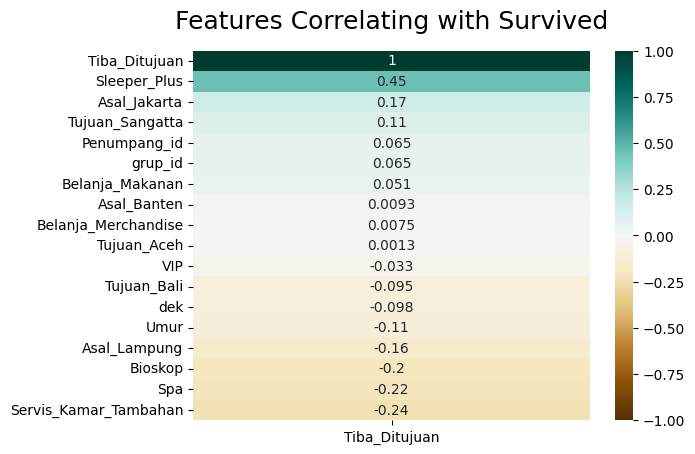

In [148]:
heatmap = sns.heatmap(train_df.corr()[['Tiba_Ditujuan']].sort_values(by='Tiba_Ditujuan', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);

In [149]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6953 entries, 0 to 6952
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleeper_Plus           6953 non-null   float64
 1   Umur                   6953 non-null   float64
 2   VIP                    6953 non-null   float64
 3   Servis_Kamar_Tambahan  6953 non-null   float64
 4   Belanja_Makanan        6953 non-null   float64
 5   Belanja_Merchandise    6953 non-null   float64
 6   Spa                    6953 non-null   float64
 7   Bioskop                6953 non-null   float64
 8   Tiba_Ditujuan          6953 non-null   float64
 9   grup_id                6953 non-null   float64
 10  dek                    6953 non-null   float64
 11  Asal_Banten            6953 non-null   float64
 12  Asal_Jakarta           6953 non-null   float64
 13  Asal_Lampung           6953 non-null   float64
 14  Tujuan_Aceh            6953 non-null   float64
 15  Tujuan_Ba

In [150]:
test_df.drop(columns=['Tiba_Ditujuan'], inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 6953 to 8691
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleeper_Plus           1739 non-null   float64
 1   Umur                   1739 non-null   float64
 2   VIP                    1739 non-null   float64
 3   Servis_Kamar_Tambahan  1739 non-null   float64
 4   Belanja_Makanan        1739 non-null   float64
 5   Belanja_Merchandise    1739 non-null   float64
 6   Spa                    1739 non-null   float64
 7   Bioskop                1739 non-null   float64
 8   grup_id                1739 non-null   float64
 9   dek                    1739 non-null   float64
 10  Asal_Banten            1739 non-null   float64
 11  Asal_Jakarta           1739 non-null   float64
 12  Asal_Lampung           1739 non-null   float64
 13  Tujuan_Aceh            1739 non-null   float64
 14  Tujuan_Bali            1739 non-null   float64
 15  Tujuan

/tmp/ipykernel_32/300211390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['Tiba_Ditujuan'], inplace=True)


In [151]:
# Masukan train data yang sudah di-preprocessing di variable df_train
df_train = train_df

# Masukan test data yang sudah di-preprocessing di variable df_test
df_test = test_df

In [152]:
X = df_train.drop(columns=['Tiba_Ditujuan'])
y = df_train['Tiba_Ditujuan']

In [153]:
# Mengimpor library yang diperlukan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [154]:
# Membuat model RandomForestClassifier
rf = RandomForestClassifier()

In [155]:
# Menentukan hyperparameters yang ingin diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)



In [156]:
# Melatih model dengan data latih
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [157]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 6953 to 8691
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleeper_Plus           1739 non-null   float64
 1   Umur                   1739 non-null   float64
 2   VIP                    1739 non-null   float64
 3   Servis_Kamar_Tambahan  1739 non-null   float64
 4   Belanja_Makanan        1739 non-null   float64
 5   Belanja_Merchandise    1739 non-null   float64
 6   Spa                    1739 non-null   float64
 7   Bioskop                1739 non-null   float64
 8   grup_id                1739 non-null   float64
 9   dek                    1739 non-null   float64
 10  Asal_Banten            1739 non-null   float64
 11  Asal_Jakarta           1739 non-null   float64
 12  Asal_Lampung           1739 non-null   float64
 13  Tujuan_Aceh            1739 non-null   float64
 14  Tujuan_Bali            1739 non-null   float64
 15  Tujuan

In [158]:
y_result = grid_search.predict(df_test)


In [159]:
df_submission = pd.DataFrame({'Penumpang_id': df_test['Penumpang_id']})
df_submission['Tiba_Ditujuan'] = y_result


In [160]:
df_submission.to_csv('submission 7.csv', index=False)

In [161]:
X_test = df_train.drop(columns=['Tiba_Ditujuan'])
y_test = df_train['Tiba_Ditujuan']
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8738673953689055
